#General Salary Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
ds_salary = pd.read_csv("https://richardson.byu.edu/220/ds_salary.csv")


             ...1    work_year         salary  salary_in_usd  remote_ratio
count  581.000000   581.000000     581.000000     581.000000    581.000000
mean   307.356282  2021.421687  123685.096386  115601.769363     71.170396
std    175.968910     0.694420   85286.402256   70607.253360     40.886810
min      0.000000  2020.000000    4000.000000    2859.000000      0.000000
25%    155.000000  2021.000000   67000.000000   66022.000000     50.000000
50%    312.000000  2022.000000  110000.000000  105000.000000    100.000000
75%    460.000000  2022.000000  157000.000000  150260.000000    100.000000
max    606.000000  2022.000000  720000.000000  600000.000000    100.000000


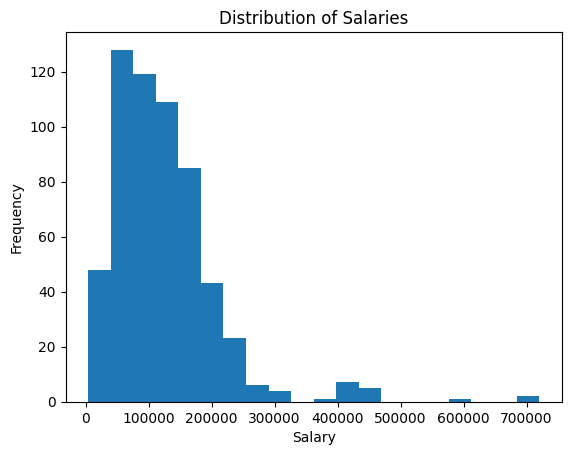

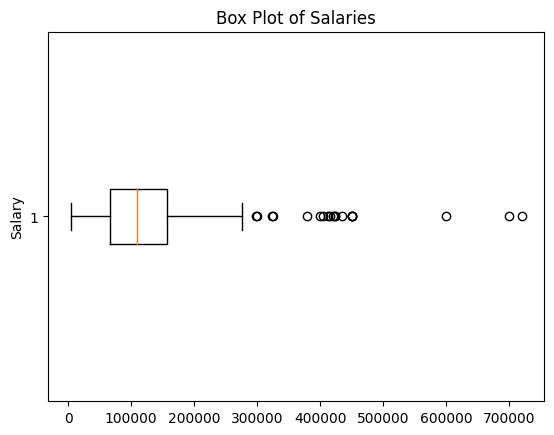

In [ ]:
print(ds_salary.describe())


plt.hist(ds_salary['salary'], bins=20)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

plt.boxplot(ds_salary['salary'], vert=False)
plt.ylabel('Salary')
plt.title('Box Plot of Salaries')
plt.show()


#Effect of Experience on Salary

<ipython-input-53-6634eb31c74a>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_experience = ds_salary.groupby('experience_level')['salary'].mean()


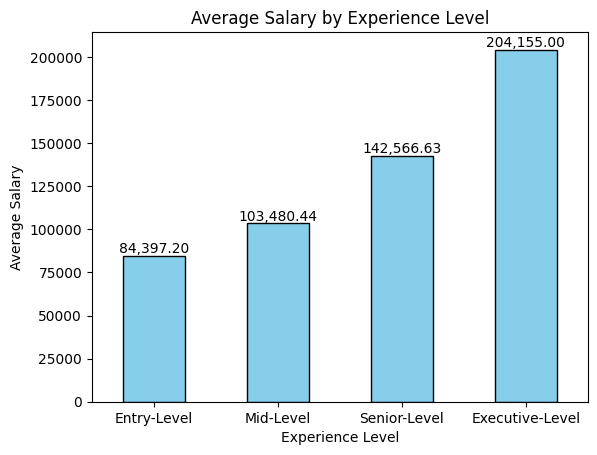

In [ ]:
# Define the custom order for the experience levels based on the specs:
#   EN Entry-level, MI Mid-level, SE Senior-level, EX Executive-level
experience_order = ['EN', 'MI', 'SE', 'EX']

# Convert 'experience_level' to a categorical type with the specified order
ds_salary['experience_level'] = pd.Categorical(ds_salary['experience_level'], categories=experience_order, ordered=True)

# Group by 'experience_level' and calculate the mean salary
salary_by_experience = ds_salary.groupby('experience_level')['salary'].mean()

# Create a bar plot
ax = salary_by_experience.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the x-axis labels so it's more readable
ax.set_xticklabels(['Entry-Level', 'Mid-Level', 'Senior-Level', 'Executive-Level'])

# Add the values on top of the bars
for i, value in enumerate(salary_by_experience):
    ax.text(i, value, f'{value:,.2f}', ha='center', va='bottom')

# Add titles and stuff
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

#Impact of Company Size on Salary

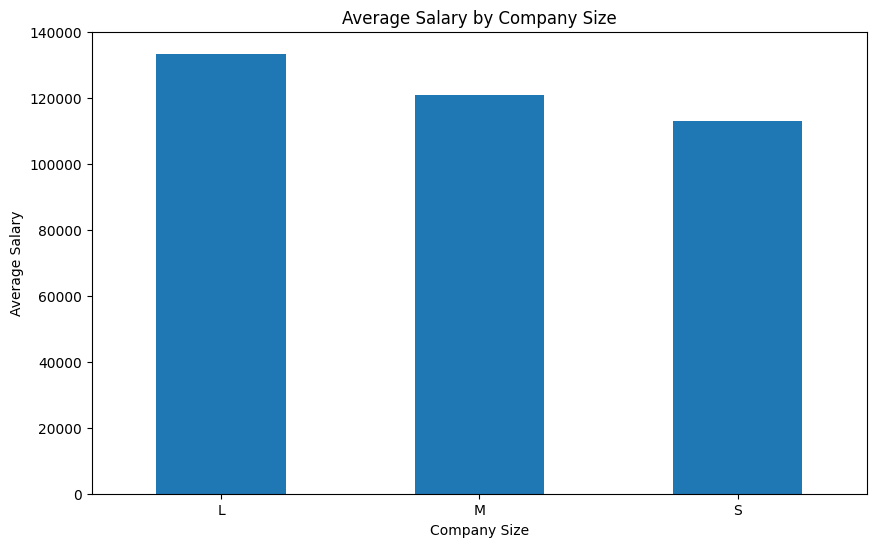

In [ ]:
avg_salary_by_size = ds_salary.groupby('company_size')['salary'].mean()
avg_salary_by_size.plot(kind='bar', rot=0, figsize=(10, 6))
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.title('Average Salary by Company Size')
plt.show()

#Job Title Analysis

In [ ]:
keyword = 'Engineer'
ds_salary['Job_Title_Contains_Engineer'] = ds_salary['job_title'].str.contains(keyword, case=False)
print(ds_salary[['job_title', 'Job_Title_Contains_Engineer']])

job_count = ds_salary['Job_Title_Contains_Engineer'].value_counts()
print("\nNumber of job titles containing 'Engineer':", job_count[True])
print("Number of job titles which do NOT contain 'Engineer':", job_count[False])


                      job_title  Job_Title_Contains_Engineer
0                Data Scientist                        False
1    Machine Learning Scientist                        False
2             Big Data Engineer                         True
3          Product Data Analyst                        False
4     Machine Learning Engineer                         True
..                          ...                          ...
576               Data Engineer                         True
577               Data Engineer                         True
578                Data Analyst                        False
579                Data Analyst                        False
580                AI Scientist                        False

[581 rows x 2 columns]

Number of job titles containing 'Engineer': 221
Number of job titles which do NOT contain 'Engineer': 360


#Interactions Between Relationships

In [ ]:
# Logan
# Investigate potential interactions between the three factors (experience, company size, and job title).
# Create a two-way table that displays essential statistics at the inter- section of two variables.
# For instance, construct a table with job titles on the left, company sizes at the top, and each
# cell representing the mean salary for each job title/company size combination.

pivot_table = pd.pivot_table(ds_salary, values='salary_in_usd', index='job_title', columns='company_size', aggfunc='mean')

print(pivot_table)

company_size                                          L              M  \
job_title                                                                
3D Computer Vision Researcher                       NaN    5409.000000   
AI Scientist                              127500.000000   66000.000000   
Analytics Engineer                                  NaN  175000.000000   
Applied Data Scientist                    175655.000000            NaN   
Applied Machine Learning Scientist        249000.000000   35137.500000   
BI Data Analyst                           150000.000000   99000.000000   
Big Data Architect                                  NaN   99703.000000   
Big Data Engineer                          37941.000000   84512.000000   
Business Data Analyst                      91253.500000            NaN   
Cloud Data Engineer                        89294.000000            NaN   
Computer Vision Engineer                            NaN   44476.750000   
Computer Vision Software Engineer     

#Conclusion

-Larger companies generally offer higher salaries, especially for senior roles, while small companies tend to pay less. The more experienced or specialized a role, the higher the salary tends to be across all company sizes.